In [129]:
import ast
import os
from os import chdir
from os.path import basename, join
import cv2
from imutils import grab_contours
import pandas as pd
import numpy as np
import gc
import time
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow


from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2

from numpy import save
from numpy import load

from sklearn import metrics
import functions_4C as fn

In [129]:
X_train=np.load('imagettes4C_HSV_train.npy')
X_test=np.load('imagettes4C_HSV_test.npy')

Y_train=np.load('labels4C_HSV_train.npy')
Y_test=np.load('labels4C_HSV_test.npy')

## 200 epochs HSV

In [121]:
lenet=fn.nn()
tensorflow.random.set_seed(2)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=200,verbose=1)

Train on 4228 samples, validate on 1057 samples
Epoch 1/200
4228/4228 [==============================] - 1s 322us/step - loss: 2.0363 - accuracy: 0.6135 - val_loss: 0.8918 - val_accuracy: 0.7133
Epoch 2/200
4228/4228 [==============================] - 1s 281us/step - loss: 1.1623 - accuracy: 0.6802 - val_loss: 0.7968 - val_accuracy: 0.7512
Epoch 3/200
4228/4228 [==============================] - 1s 285us/step - loss: 0.9677 - accuracy: 0.7171 - val_loss: 0.8212 - val_accuracy: 0.7304
Epoch 4/200
4228/4228 [==============================] - 1s 273us/step - loss: 1.0678 - accuracy: 0.7032 - val_loss: 0.9384 - val_accuracy: 0.7152
Epoch 5/200
4228/4228 [==============================] - 1s 285us/step - loss: 0.8358 - accuracy: 0.7502 - val_loss: 0.6722 - val_accuracy: 0.7881
Epoch 6/200
4228/4228 [==============================] - 1s 286us/step - loss: 0.7607 - accuracy: 0.7670 - val_loss: 0.8678 - val_accuracy: 0.7247
Epoch 7/200
4228/4228 [==============================] - 1s 277us/step

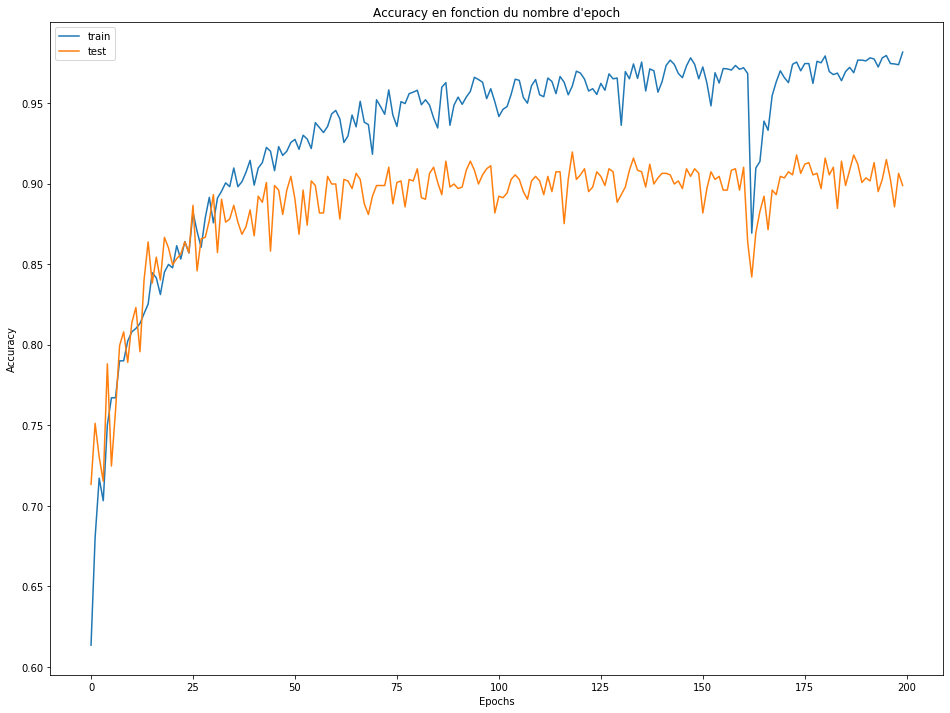

In [126]:
plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/200ep_6CL_4CH')

In [132]:
y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(y_predict,Y_test,digits=5))

              precision    recall  f1-score   support

           0    0.97869   0.91988   0.94837       649
           1    0.57692   0.62500   0.60000        24
           2    0.91371   0.91837   0.91603       196
           3    0.72308   0.75806   0.74016        62
           4    0.52941   0.66667   0.59016        27
           5    0.74400   0.93939   0.83036        99

    accuracy                        0.89877      1057
   macro avg    0.74430   0.80456   0.77085      1057
weighted avg    0.90907   0.89877   0.90205      1057



## Avec 100 epochs HSV

In [140]:
lenet=nn()
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=100,verbose=0)

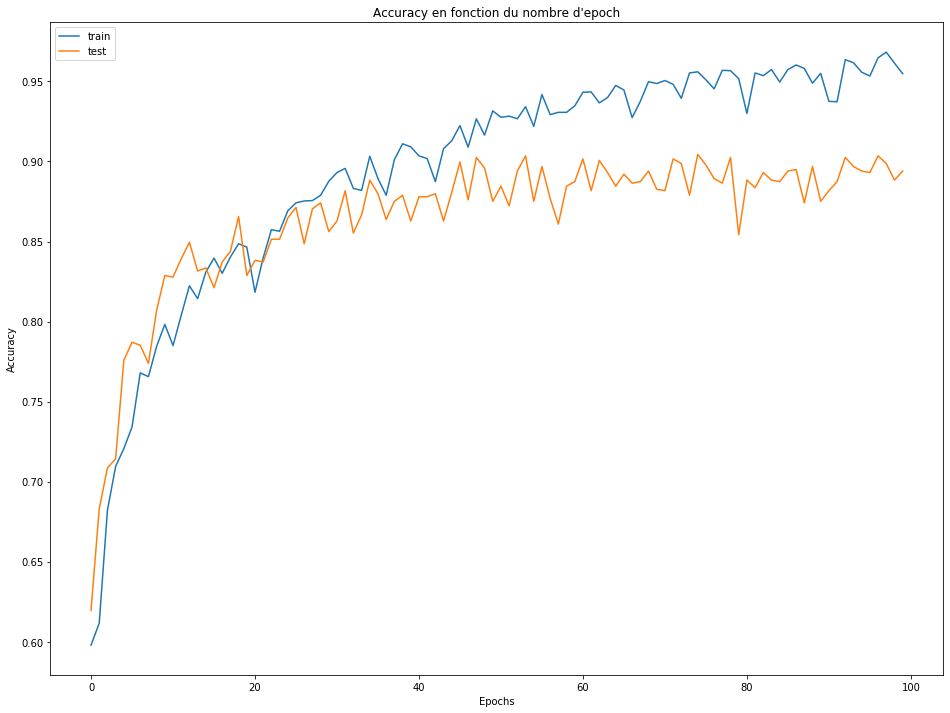

In [141]:
plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/100ep_HSV__6CL_4CH')

In [145]:
y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(y_predict,Y_test,digits=5))

              precision    recall  f1-score   support

           0    0.97213   0.90259   0.93607       657
           1    0.53846   0.87500   0.66667        16
           2    0.91878   0.94271   0.93059       192
           3    0.60000   0.82979   0.69643        47
           4    0.35294   0.66667   0.46154        18
           5    0.84800   0.83465   0.84127       127

    accuracy                        0.89404      1057
   macro avg    0.70505   0.84190   0.75543      1057
weighted avg    0.91387   0.89404   0.90087      1057

